#### [bosch kaggle info](https://www.kaggle.com/c/bosch-production-line-performance/data)

[pyspark doc](https://spark.apache.org/docs/2.0.0-preview/api/python/_modules/pyspark/sql/session.html)

** file path **
/home/h/fun/bosch/raw_data

Data Files

- ** 目标是要预测哪个部分会在质量控制过程中失败，用'Response' = 1表示该状态。**
- ** 数据集包含了非常大的匿名特征数据。**
- ** 数据已经按照类型切成两类，数值型和类别型两个大文件。日期特征给每个测量值提供了发生的时间戳。每个日期列都对应于每个特征的生成日期，如L0_S0_D1是特征列L0_S0_F0的日期列。 ** 
- ** 难点： 量大，正负样本的极度不均衡 **

File descriptions

* train_numeric.csv - the training set numeric features (this file contains the 'Response' variable) 
* test_numeric.csv - the test set numeric features (you must predict the 'Response' for these Ids)  
* train_categorical.csv - the training set categorical features  
* test_categorical.csv - the test set categorical features  
* train_date.csv - the training set date features  
* test_date.csv - the test set date features  
* sample_submission.csv - a sample submission file in the correct format 

In [14]:
%cd raw_data/
%ls
%cd ..

/home/h/kaggle_fun/bosch/raw_data
down_data/            test_numeric.csv       train_numeric.csv
test_categorical.csv  train_categorical.csv  zips/
test_date.csv         train_date.csv
/home/h/kaggle_fun/bosch


In [15]:
import pandas as pd
import os

In [16]:
train_date = pd.read_csv("raw_data/train_date.csv", nrows=100)
train_category = pd.read_csv("raw_data/train_categorical.csv", nrows=100)
train_numer = pd.read_csv("raw_data/train_numeric.csv", nrows=1000)

In [17]:
train_category.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
train_date.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
train_numer.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
train_category.describe

<bound method DataFrame.describe of      Id  L0_S1_F25  L0_S1_F27  L0_S1_F29  L0_S1_F31  L0_S2_F33  L0_S2_F35  \
0     4        NaN        NaN        NaN        NaN        NaN        NaN   
1     6        NaN        NaN        NaN        NaN        NaN        NaN   
2     7        NaN        NaN        NaN        NaN        NaN        NaN   
3     9        NaN        NaN        NaN        NaN        NaN        NaN   
4    11        NaN        NaN        NaN        NaN        NaN        NaN   
5    13        NaN        NaN        NaN        NaN        NaN        NaN   
6    14        NaN        NaN        NaN        NaN        NaN        NaN   
7    16        NaN        NaN        NaN        NaN        NaN        NaN   
8    18        NaN        NaN        NaN        NaN        NaN        NaN   
9    23        NaN        NaN        NaN        NaN        NaN        NaN   
10   26        NaN        NaN        NaN        NaN        NaN        NaN   
11   27        NaN        NaN        NaN

In [21]:
from operator import add

counts = sc.parallelize([1,2,3,4]).map(lambda x: x^2).reduce(add)
print type(counts)
print counts
# for (word, count) in output:
#         print("%s: %i" % (word, count))

<type 'int'>
10


In [22]:
cat_data =sc.textFile("/home/h/kaggle_fun/bosch/raw_data/train_categorical.csv")

In [23]:
cat_data.count()

1183748

In [24]:
spark = SparkSession.builder \
    .master("spark://h:7077") \
    .appName("Word Count") \
    .getOrCreate()

In [25]:
file_dir = "/home/h/kaggle_fun/bosch/raw_data/"
train_cat = "train_categorical.csv"
train_numeric = "train_numeric.csv"
train_date= "train_date.csv"
train_cat_df = spark.read.csv(file_dir + train_cat, header=True, inferSchema=True)
train_numerer_df = spark.read.csv(file_dir + train_numeric, header=True, inferSchema=True)
train_date_df = spark.read.csv(file_dir + train_date, header=True, inferSchema=True)

In [26]:
train_numerer_df.registerTempTable("train_num")

In [27]:
res = spark.sql("select Response, sum(Response) from train_num group by Response")

In [28]:
print res.collect()

[Row(Response=1, sum(Response)=6879), Row(Response=0, sum(Response)=0)]


In [29]:
print spark.sql("select count(*) from train_num ").collect()

[Row(count(1)=1183747)]


In [30]:
print 1183747-6879

1176868


In [31]:
train_sample = spark.sql("select *, rand() from train_num where Response = 1 or (Response = 0 and rand() < 1.2*6879/1183747)")

In [32]:
train_sample.count()

15194

In [33]:
train_df = train_sample.toPandas()

In [34]:
train_df.describe()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response,rand(8831981964182184965)
count,15194.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,...,366,366.000000,366.000000,366.000000,719.000000,719.000000,719.000000,719.000000,15194.000000,15194.000000
mean,1194006.286363,0.000870,0.001597,-0.016316,-0.016183,0.001663,-0.003289,-0.000901,-0.005448,-0.004175,...,0,0.000795,0.000049,0.006831,-0.000010,0.000001,0.000434,0.000024,0.452745,0.500478
std,686102.630876,0.078442,0.090984,0.205341,0.205860,0.096842,0.165869,0.018854,0.101028,0.114086,...,0,0.008751,0.000374,0.250249,0.000098,0.000037,0.008492,0.000318,0.497778,0.289035
min,31.000000,-0.323000,-0.399000,-0.397000,-0.397000,-0.404000,-0.566000,-0.044000,-0.232000,-0.373000,...,0,0.000000,0.000000,-0.250000,-0.001000,0.000000,0.000000,0.000000,0.000000,0.000059
25%,602957.250000,-0.049000,-0.056000,-0.179000,-0.179000,-0.056000,-0.066000,-0.015000,-0.072000,-0.087000,...,0,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.247406
50%,1191932.000000,0.003000,0.004000,-0.033000,-0.034000,0.031000,0.025000,-0.007000,-0.032000,-0.005000,...,0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500412
75%,1798103.000000,0.056000,0.063000,0.003000,0.003000,0.074000,0.116000,0.015000,0.048000,0.071000,...,0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.752251
max,2367123.000000,0.258000,0.272000,0.567000,0.566000,0.292000,0.206000,0.089000,0.448000,0.413000,...,0,0.132000,0.005000,0.250000,0.000000,0.001000,0.217000,0.006000,1.000000,0.999890


In [36]:
train_df.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response,rand(8831981964182184965)
0,31,-0.003,-0.093,-0.161,-0.216,0.118,-0.021,-0.015,0.048,-0.031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.285435
1,363,0.023,-0.004,0.312,0.330,-0.013,0.070,0.015,0.128,0.337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.990560
2,376,0.075,0.123,-0.015,-0.016,0.031,0.025,-0.015,-0.112,0.168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.142607
3,729,0.030,0.019,0.330,0.294,0.031,0.161,0.015,0.088,-0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.626387
4,747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.530926


In [44]:
import matplotlib.pyplot as plt
import pandas
import numpy

In [48]:
corr_matrix = train_df.corr()

In [43]:
#http://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
corr_matrix["Response"].abs().sort_values(ascending=False).apply(lambda x: '%.3f' % x)

Response        1.000
L1_S25_F2564    0.656
L1_S25_F2657    0.627
L1_S25_F2662    0.568
L1_S25_F2287    0.546
L1_S25_F2516    0.500
L1_S25_F2741    0.488
L1_S25_F2504    0.488
L1_S25_F2579    0.478
L1_S25_F2297    0.459
L1_S25_F2545    0.450
L1_S25_F2193    0.443
L1_S25_F2559    0.433
L1_S25_F2307    0.419
L1_S24_F867     0.412
L1_S24_F839     0.403
L1_S25_F2613    0.398
L1_S25_F2525    0.392
L1_S25_F2647    0.389
L1_S24_F1723    0.380
L2_S28_F3259    0.379
L1_S25_F2554    0.377
L1_S25_F2714    0.374
L1_S24_F902     0.366
L1_S25_F2199    0.361
L1_S24_F1002    0.349
L1_S25_F2385    0.347
L1_S25_F2726    0.343
L1_S25_F2632    0.334
L1_S24_F1386    0.313
                ...  
L1_S25_F2761    0.000
L1_S25_F2764    0.000
L1_S25_F2187    0.000
L1_S25_F2190    0.000
L0_S2_F52         nan
L0_S3_F88         nan
L0_S14_F378       nan
L0_S15_F409       nan
L1_S24_F751       nan
L1_S24_F761       nan
L1_S24_F1486      nan
L3_S30_F3594      nan
L3_S30_F3599      nan
L3_S30_F3614      nan
L3_S30_F36

In [45]:
import xgboost as xgb

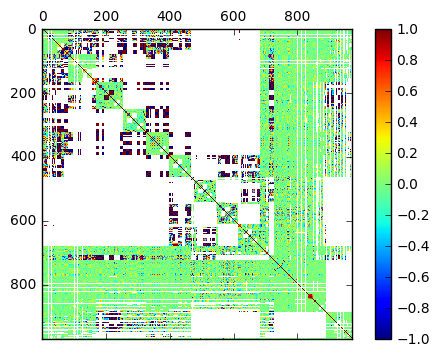

In [51]:
#http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [89]:
#http://datascience.stackexchange.com/questions/12799/pandas-dataframe-to-dmatrix
from sklearn.cross_validation import train_test_split
train, test = train_test_split(train_df, test_size = 0.2)
train_target = train['Response']
train_data = train.drop(["Id"],axis=1)
xgtrain = xgb.DMatrix(train_data, train_target.values)
xgtest = xgb.DMatrix(test.drop(["Id"], axis=1))

In [90]:
#xgtest.feature_names
xgtrain.feature_names

[u'L0_S0_F0',
 u'L0_S0_F2',
 u'L0_S0_F4',
 u'L0_S0_F6',
 u'L0_S0_F8',
 u'L0_S0_F10',
 u'L0_S0_F12',
 u'L0_S0_F14',
 u'L0_S0_F16',
 u'L0_S0_F18',
 u'L0_S0_F20',
 u'L0_S0_F22',
 u'L0_S1_F24',
 u'L0_S1_F28',
 u'L0_S2_F32',
 u'L0_S2_F36',
 u'L0_S2_F40',
 u'L0_S2_F44',
 u'L0_S2_F48',
 u'L0_S2_F52',
 u'L0_S2_F56',
 u'L0_S2_F60',
 u'L0_S2_F64',
 u'L0_S3_F68',
 u'L0_S3_F72',
 u'L0_S3_F76',
 u'L0_S3_F80',
 u'L0_S3_F84',
 u'L0_S3_F88',
 u'L0_S3_F92',
 u'L0_S3_F96',
 u'L0_S3_F100',
 u'L0_S4_F104',
 u'L0_S4_F109',
 u'L0_S5_F114',
 u'L0_S5_F116',
 u'L0_S6_F118',
 u'L0_S6_F122',
 u'L0_S6_F132',
 u'L0_S7_F136',
 u'L0_S7_F138',
 u'L0_S7_F142',
 u'L0_S8_F144',
 u'L0_S8_F146',
 u'L0_S8_F149',
 u'L0_S9_F155',
 u'L0_S9_F160',
 u'L0_S9_F165',
 u'L0_S9_F170',
 u'L0_S9_F175',
 u'L0_S9_F180',
 u'L0_S9_F185',
 u'L0_S9_F190',
 u'L0_S9_F195',
 u'L0_S9_F200',
 u'L0_S9_F205',
 u'L0_S9_F210',
 u'L0_S10_F219',
 u'L0_S10_F224',
 u'L0_S10_F229',
 u'L0_S10_F234',
 u'L0_S10_F239',
 u'L0_S10_F244',
 u'L0_S10_F249',
 u'L0

In [95]:
#http://xgboost.readthedocs.io/en/latest/get_started/index.html#python
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, xgtrain, num_round)
# make prediction
#preds = bst.predict(xgtest)

In [96]:
preds = bst.predict(xgtest)

In [99]:
for i in preds:
    print i.

0.0417792
0.958198
0.958198
0.958198
0.0417792
0.0417792
0.958198
0.0417792
0.958198
0.958198
0.0417792
0.0417792
0.958198
0.958198
0.0417792
0.958198
0.958198
0.958198
0.0417792
0.958198
0.0417792
0.0417792
0.958198
0.958198
0.958198
0.0417792
0.958198
0.0417792
0.0417792
0.0417792
0.0417792
0.0417792
0.0417792
0.958198
0.958198
0.958198
0.958198
0.0417792
0.958198
0.0417792
0.0417792
0.958198
0.958198
0.958198
0.0417792
0.0417792
0.958198
0.0417792
0.958198
0.0417792
0.0417792
0.958198
0.0417792
0.958198
0.0417792
0.0417792
0.958198
0.958198
0.0417792
0.958198
0.0417792
0.0417792
0.0417792
0.0417792
0.958198
0.958198
0.0417792
0.0417792
0.0417792
0.958198
0.958198
0.0417792
0.958198
0.0417792
0.958198
0.958198
0.0417792
0.0417792
0.958198
0.0417792
0.958198
0.0417792
0.0417792
0.958198
0.958198
0.0417792
0.958198
0.0417792
0.0417792
0.0417792
0.0417792
0.0417792
0.958198
0.0417792
0.0417792
0.958198
0.958198
0.0417792
0.0417792
0.958198
0.958198
0.0417792
0.0417792
0.958198
0.0417792